In [71]:
import vvcpy as vp

yaml_file = 'setuptest.yaml'
out = vp.common.commonlib.yaml_reader(yaml_file, 'out')

output_path = out
cfg         = 'AI'
file        = 'RaceHorses'
version     = 'Precise'
qp          = 22
qps         = [22, 27, 32, 37]


In [81]:

path_to_vtm_logs = vp.common.log_path.vvc_log_path(
    path = output_path,
    cfg = cfg,
    file = file,
    version = version,
    qps = qps,
    multiqp=True
)
path_to_vtm_log = vp.common.log_path.vvc_log_path(
    path = output_path,
    cfg = cfg,
    file = file,
    version = version,
    qps = qp,
    multiqp=False
)
path_to_gprof_log = vp.common.log_path.gprof_log_path(
    path = output_path,
    cfg = cfg,
    file = file,
    version = version,
    qps = qp,
    multiqp=False
)
path_to_vtm_logs

['/mnt/c/Users/dudup/Downloads/SATD-research-Analise-Jupyter/SATD-research-Analise-Jupyter/outputTests/vvc_log/Precise/RaceHorses/AI/log_RaceHorses_qp22_AI_Precise.vvclog',
 '/mnt/c/Users/dudup/Downloads/SATD-research-Analise-Jupyter/SATD-research-Analise-Jupyter/outputTests/vvc_log/Precise/RaceHorses/AI/log_RaceHorses_qp27_AI_Precise.vvclog',
 '/mnt/c/Users/dudup/Downloads/SATD-research-Analise-Jupyter/SATD-research-Analise-Jupyter/outputTests/vvc_log/Precise/RaceHorses/AI/log_RaceHorses_qp32_AI_Precise.vvclog',
 '/mnt/c/Users/dudup/Downloads/SATD-research-Analise-Jupyter/SATD-research-Analise-Jupyter/outputTests/vvc_log/Precise/RaceHorses/AI/log_RaceHorses_qp37_AI_Precise.vvclog']

<Axes: xlabel='bitrate'>

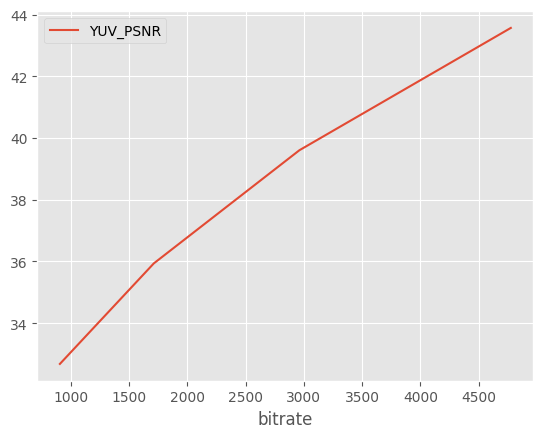

In [87]:
dfv1 = vp.prof.VVC_Output()
dfv1 = dfv1.read_multifile(path_to_vtm_logs, qps)
dfv1.plot('bitrate', 'YUV_PSNR')
#dfv1.to_csv('data.xlsx')


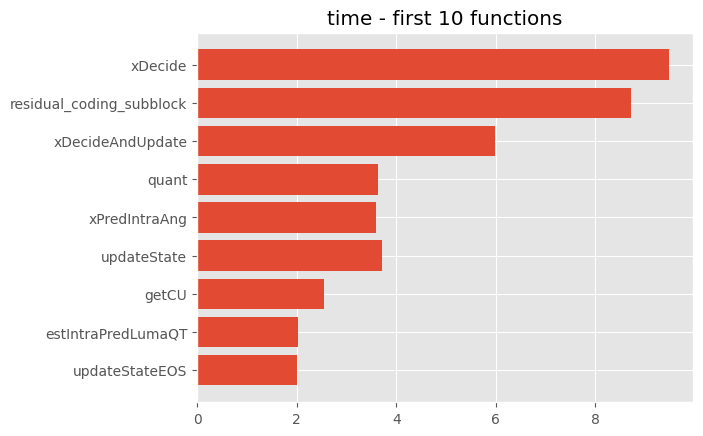

In [88]:
dfg = vp.prof.GprofDF()
dfg.read_file(path_to_gprof_log)
dfg.gplot()
#dfg.to_csv('data2.xslx')

In [89]:
approximate_version = '4x8--1'

path_to_approximate_vtm_logs = vp.common.log_path.vvc_log_path(
    path = output_path,
    cfg = cfg,
    file = file,
    version = approximate_version,
    qps = qps,
    multiqp=True
)
dfv2 = vp.prof.VVC_Output()
dfv2 = dfv2.read_multifile(path_to_approximate_vtm_logs, qps)

dfb = vp.prof.BD_Rate(
    version=approximate_version,
    video=file,
    cfg=cfg
)

dfb = dfb.calc_bdbr(dfv2, dfv1)
#dfb.to_csv('data3.csv')
dfb

version  video       cfg  frame
4x8--1   RaceHorses  AI   -1       0.089631
Name: bd-rate, dtype: float64

In [90]:
vp.prof.vvc_frame_analysis(
    '4x8--1', ['RaceHorses'], path_to_vtm_logs, ['AI'], qps=qps
)

TypeError: expected str, bytes or os.PathLike object, not list